# Create model using NN class (LightningModule), create CustomDataModule (LightningDataModule), set up Trainer, and then fit, validate and test

In [1]:
# Train model
from model import NN
from customDataModule import CustomDataModule
import config
import pytorch_lightning as pl
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_lightning.loggers import CSVLogger
from lightning.pytorch import seed_everything
from lightning.pytorch.loggers import TensorBoardLogger
from vgg16 import *
import torch
from pytorch_lightning.callbacks import ModelCheckpoint

seed_everything(
    99, workers=True
)  # By setting workers=True in seed_everything(), Lightning derives unique seeds across all dataloader workers and processes for torch, numpy and stdlib random number generators. When turned on, it ensures that e.g. data augmentations are not repeated across workers.

callbacks = [ModelCheckpoint(
    save_top_k=1, mode='min', monitor="val_loss")]  # save top 1 model 

if __name__ == "__main__":
    
    pytorch_model = PyTorchVGG16(num_classes=config.NUM_CLASSES)
    
    logger = TensorBoardLogger("tb_logs_vgg16", name="vgg16") # tb_logs is the folder, name is the name of the experiment/model
    logger2 = CSVLogger(save_dir="logs/", name="vgg16")
    
    model = NN(
        model=pytorch_model,
        input_size=config.IN_CHANNELS,
        num_classes=config.NUM_CLASSES,
        learning_rate=config.LEARNING_RATE,
    )  # .to(device)
    dm = CustomDataModule(
        data_dir=config.DATA_DIR,
        train_csv=config.TRAIN_CSV_1,
        val_csv=config.VAL_CSV_1,
        test_csv=config.TEST_CSV,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
    )
    trainer = pl.Trainer(
        logger=[logger2, logger], # PyTorch lightning will automatically know what we are logging by looking at our model.py logs
        accelerator=config.ACCELERATOR,
        devices=config.DEVICES,
        min_epochs=config.MIN_EPOCHS,
        max_epochs=3,
        deterministic=config.DETERMINISTIC,
        callbacks=callbacks
    )  # deterministic ensures random seed reproducibility

    trainer.fit(model, dm)  # it will automatically know which dataloader to use

# A general place to start is to set num_workers equal to the number of CPU cores on that machine. You can get the number of CPU cores in python using os.cpu_count(), but note that depending on your batch size, you may overflow RAM memory.


Global seed set to 99
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\kaspe\.conda\envs\LBST\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:612: UserWarning: Checkpoint directory logs/vgg16\version_0\checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type            | Params
----------------------------------------------------
0 | model           | PyTorchVGG16    | 134 M 
1 | loss_fn         | BCELoss         | 0     
2 | train_acc       | BinaryAccuracy  | 0     
3 | val_acc         | BinaryAccuracy  | 0     
4 | train_recall    | BinaryRecall    | 0     
5 | val_recall      | BinaryRecall    | 0     
6 | train_precision | BinaryPrecision | 0     
7 | val_precision   | BinaryPrecision | 0     
8 | train_f1score   | BinaryF1Score

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]PREDICTIONS:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
GROUND TRUTH:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0')
Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:02<00:02,  2.19s/it]PREDICTIONS:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
GROUND TRUTH:  tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       device='cuda:0')


C:\Users\kaspe\.conda\envs\LBST\lib\site-packages\pytorch_lightning\loops\fit_loop.py:280: PossibleUserWarning: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:   0%|          | 0/20 [00:00<?, ?it/s] PREDICTIONS:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
GROUND TRUTH:  tensor([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.],
       device='cuda:0')
Epoch 0:   5%|▌         | 1/20 [00:06<01:57,  6.19s/it, v_num=0_30]PREDICTIONS:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
GROUND TRUTH:  tensor([1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       device='cuda:0')
Epoch 0:  10%|█         | 2/20 [00:07<01:05,  3.66s/it, v_num=0_30]PREDICTIONS:  tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it, v_num=0_30, train_loss=41.20, train_accuracy=0.588, train_recall=0.000, train_precision=0.000, train_f1score=0.000]


In [7]:
for x in dm.train_dataloader():  
    break
print(type(x))
print(x)


<class 'list'>
[tensor([[[[ 1.3755,  1.3413,  1.3413,  ...,  0.9474,  0.8618,  0.9988],
          [ 1.3413,  1.3242,  1.3242,  ...,  0.8618,  0.8961,  1.0331],
          [ 1.3413,  1.3413,  1.3242,  ...,  0.8789,  0.9817,  1.0844],
          ...,
          [-0.1143, -0.3712, -0.3883,  ..., -0.4226,  0.0569,  0.1939],
          [-0.2684, -0.0972, -0.1657,  ..., -0.2342, -0.1314,  0.1083],
          [-0.3712, -0.0801, -0.1828,  ..., -0.0458, -0.0629,  0.0912]],

         [[ 1.8158,  1.7983,  1.7983,  ...,  1.7808,  1.7108,  1.8333],
          [ 1.7983,  1.7808,  1.7808,  ...,  1.7108,  1.7283,  1.8508],
          [ 1.7983,  1.7983,  1.7808,  ...,  1.7108,  1.7983,  1.8859],
          ...,
          [ 0.2927, -0.0224,  0.0126,  ..., -0.0924,  0.3277,  0.5378],
          [ 0.0476,  0.2402,  0.1352,  ...,  0.0826,  0.2052,  0.5203],
          [-0.0399,  0.2402,  0.0126,  ...,  0.3277,  0.3452,  0.5378]],

         [[ 2.3437,  2.3088,  2.2914,  ...,  2.6226,  2.5877,  2.5877],
          [ 2.

In [14]:
for preds in dm.train_dataloader():  
    break
print(preds)

[tensor([[[[-1.0390, -1.0390, -1.0562,  ...,  2.2489,  2.2489,  2.2489],
          [-1.1932, -1.2445, -1.2274,  ...,  2.2489,  2.2489,  2.2489],
          [-1.2617, -1.3987, -1.3473,  ...,  2.2489,  2.2489,  2.2489],
          ...,
          [-1.0733, -1.1760, -0.6623,  ..., -1.0733, -1.1247, -1.2103],
          [-0.5253, -0.9877, -0.8507,  ..., -0.9877, -0.9534, -1.1760],
          [-0.3027, -0.6623, -0.8849,  ..., -1.0562, -1.0048, -1.2103]],

         [[-0.7927, -0.7927, -0.7752,  ...,  2.4286,  2.4286,  2.4286],
          [-0.9153, -0.9853, -0.9503,  ...,  2.4286,  2.4286,  2.4286],
          [-1.0028, -1.1078, -1.0903,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [-0.9328, -0.8277, -0.5126,  ..., -0.6352, -0.5301, -0.5476],
          [-0.4426, -0.7052, -0.5826,  ..., -0.5651, -0.4251, -0.5301],
          [-0.3025, -0.4601, -0.5651,  ..., -0.5826, -0.6176, -0.7052]],

         [[-0.8633, -0.8458, -0.8458,  ...,  2.6400,  2.6400,  2.6400],
          [-0.9504, -0.9678, 

In [16]:
for labels in dm.train_dataloader():  
    break
print(labels)

[tensor([[[[ 0.9988,  1.0159,  0.8618,  ...,  0.1768,  0.7248,  0.3994],
          [ 0.7933,  1.1700,  0.9988,  ...,  0.2967,  0.5878,  0.2453],
          [ 1.2557,  1.4269,  0.8276,  ...,  0.3994,  0.1426,  0.0569],
          ...,
          [-1.8610, -1.3473, -1.9467,  ..., -0.6281, -1.0562, -0.7822],
          [-1.8782, -1.4500, -1.9124,  ..., -0.5596, -0.6281, -1.0904],
          [-1.9638, -1.7412, -1.8953,  ..., -1.0048, -0.1486, -0.2171]],

         [[ 1.0105,  0.9230,  0.8004,  ...,  0.1527,  0.6954,  0.4153],
          [ 0.6779,  1.1681,  0.8354,  ...,  0.1877,  0.4153,  0.0826],
          [ 1.1681,  1.3782,  0.6078,  ...,  0.2227, -0.0924, -0.1625],
          ...,
          [-1.5455, -1.0203, -1.6681,  ..., -0.8102, -1.1253, -0.8277],
          [-1.6681, -1.1253, -1.6331,  ..., -0.8452, -0.8627, -1.1429],
          [-1.8606, -1.4930, -1.6681,  ..., -1.1253, -0.6001, -0.5301]],

         [[ 0.0779,  0.3393,  0.3916,  ..., -0.4450, -0.0267, -0.2707],
          [ 0.1999,  0.5659, 

In [3]:
for x, y in dm.train_dataloader():  
    break

print(x)

tensor([[[[ 1.3070,  1.3070,  1.2899,  ..., -1.4843, -1.6727, -1.6213],
          [ 1.2899,  1.2899,  1.2899,  ..., -1.6042, -1.6384, -1.5185],
          [ 1.2899,  1.2899,  1.2899,  ..., -1.6727, -1.6042, -1.6213],
          ...,
          [-0.1314,  0.0741,  0.1939,  ..., -0.0458, -0.9363, -0.6623],
          [ 0.0741, -0.0629, -0.2342,  ...,  0.3994, -0.5767, -0.5424],
          [ 0.0741, -0.5424, -0.4911,  ...,  0.0569, -0.2684, -0.4911]],

         [[ 1.6057,  1.5882,  1.5532,  ..., -1.3179, -1.5280, -1.4580],
          [ 1.6232,  1.6232,  1.6057,  ..., -1.4405, -1.4930, -1.3704],
          [ 1.7283,  1.7283,  1.7283,  ..., -1.5105, -1.4405, -1.4580],
          ...,
          [-0.3200, -0.1450, -0.0399,  ...,  0.4328, -0.4251, -0.1099],
          [-0.1099, -0.2500, -0.4426,  ...,  0.8354, -0.1975, -0.1099],
          [-0.0749, -0.6877, -0.6527,  ...,  0.4853,  0.0476, -0.1450]],

         [[ 2.2914,  2.2914,  2.2740,  ..., -1.0376, -1.2293, -1.1770],
          [ 2.2914,  2.3088,  

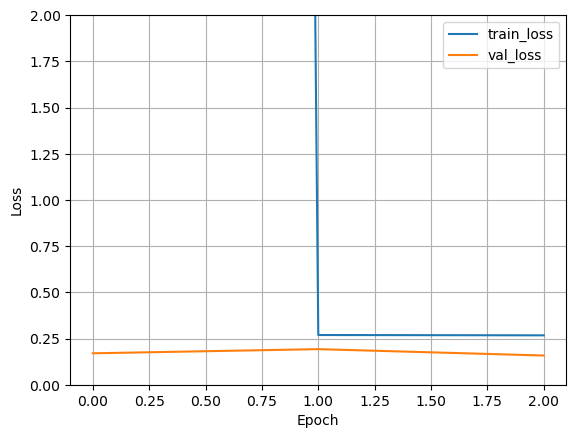

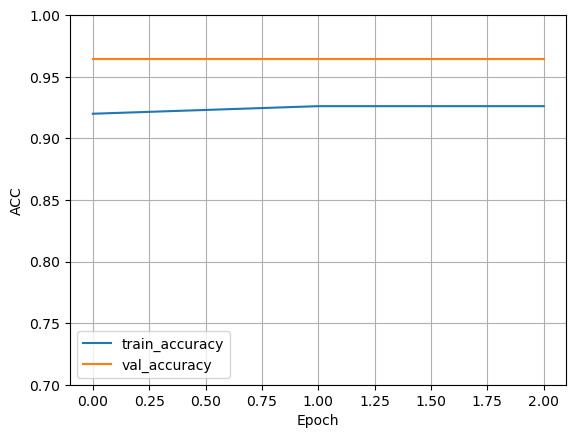

In [4]:
from plot_loss_and_acc import *
plot_loss_and_acc(trainer.logger.log_dir, loss_ylim=(0.0, 2.0))

<AxesSubplot:xlabel='Epoch', ylabel='ACC'>

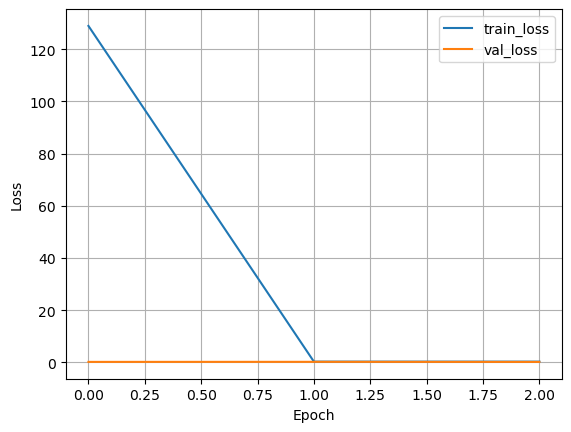

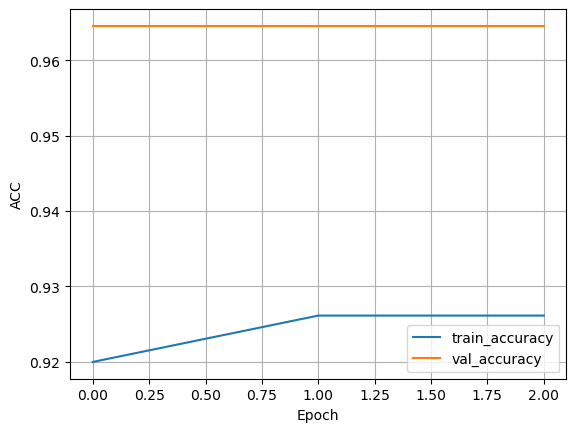

In [3]:
import pandas as pd


metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel='Epoch', ylabel='Loss')
df_metrics[["train_accuracy", "val_accuracy"]].plot(
    grid=True, legend=True, xlabel='Epoch', ylabel='ACC')

In [5]:
model

NN(
  (model): PyTorchVGG16(
    (block_1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block_2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block_3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU()
      (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): ReLU()
      (6): Ma

In [6]:
trainer.validate(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 88/88 [00:44<00:00,  1.97it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       val_accuracy        │    0.9645415544509888     │
│        val_f1score        │    0.9645415544509888     │
│         val_loss          │    0.15803585946559906    │
│       val_precision       │    0.9645415544509888     │
│        val_recall         │    0.9645415544509888     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.15803585946559906,
  'val_accuracy': 0.9645415544509888,
  'val_recall': 0.9645415544509888,
  'val_precision': 0.9645415544509888,
  'val_f1score': 0.9645415544509888}]

In [7]:
trainer.test(model, datamodule=dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 108/108 [01:09<00:00,  1.55it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.26971274614334106    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.26971274614334106}]

In [8]:
pred = []
y = []

for x, y in dm.val_dataloader():
    
    with torch.no_grad():
        pred = model(x)
    cmat(pred, y)

print(pred)
print(y)

NameError: name 'cmat' is not defined

In [5]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
#%tensorboard --logdir tb_logs

In [19]:
# Confusion matrix

class_dict = {0: 'approved',
              1: 'nonapproved'}
class_names = ['approved', 'nonapproved']

from torchmetrics import ConfusionMatrix


cmat = ConfusionMatrix(num_classes=len(class_dict), task = "multiclass")

for x, y in dm.test_dataloader():
    
    with torch.no_grad():
        pred = model(x)
    cmat(pred, y)

cmat_tensor = cmat.compute()

# Turn tensor into np array
np_arr = cmat_tensor.detach().cpu().numpy()

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=np_arr,
                               class_names=class_names)
plt.show()

AttributeError: 'DataLoader' object has no attribute 'test_dataloader'

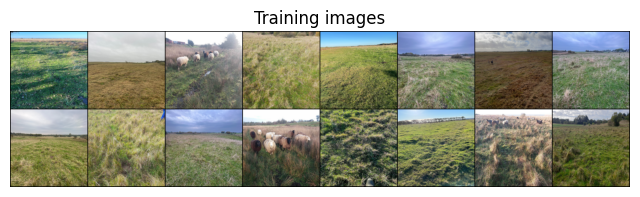

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision


for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

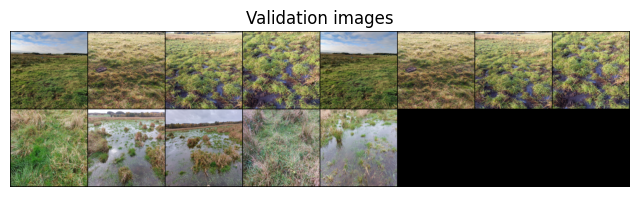

In [6]:
for images, labels in dm.val_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Validation images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

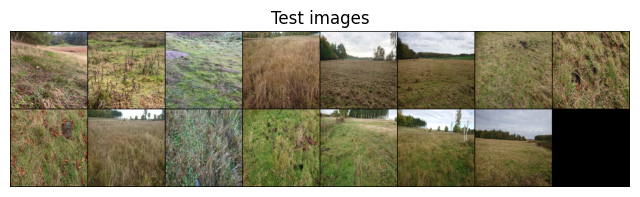

In [7]:
for images, labels in dm.test_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Test images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()